# Classification Trees 













# Load file
Commonly two libraries are used to load a csv files.
- numpy function `np.loadtext` and `np.genfromtext ` 
- pandas function `pd.read_csv`

Here we prefer using pandas

In [1]:
import pandas as pd

path='/Users/vahidpartovinia/Desktop/'
# path is your local file address
# in MS Windows you must write 'C:\\Users\\..'

filename = path+'spamdata.csv'
spam = pd.read_csv(filename)

In [2]:
# see the data
spam.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,parentheses,backet,exclamation,dollar,sharp,length_average,length_longest,length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


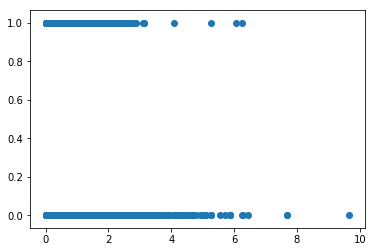

In [3]:

#features against spam, spam=1, ham=0
import matplotlib.pyplot as plt
%matplotlib inline 

#plot column number 12, versus ('ham or spam')

plt.scatter(spam.values[:,11], spam.values[:,-1]);

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# you may play with max_depth  

dt = DecisionTreeClassifier(max_depth=2)
# you may play with depth and prune the tree in different levels

X = spam.values[:, :57]
y = spam.values[:, -1]

dt.fit(X,y)
spamnames = spam.columns.tolist()[:57]

In [5]:
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=spamnames,  
                         filled=True, rounded=True,  
                         special_characters=True)  

In [6]:
dot_data = export_graphviz(dt, out_file=None) 

In [7]:
# you need to install graphviz-python from Anaconda, 
# graphviz-python it is not installed by default.
import graphviz

In [8]:
graph = graphviz.Source(dot_data) 

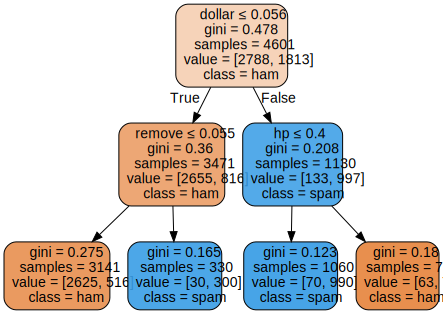

In [9]:
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=spamnames,  
                         class_names=['ham', 'spam'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [12]:
dt10 = DecisionTreeClassifier(max_depth=10)
dt11 = DecisionTreeClassifier(max_depth=11)
dt12 = DecisionTreeClassifier(max_depth=12)

# you may play with depth and prune the tree in different levels
dt10.fit(X_train,y_train)
dt11.fit(X_train,y_train)
dt12.fit(X_train,y_train)

y10_pred = dt10.predict(X_test)
y11_pred = dt11.predict(X_test)
y12_pred = dt12.predict(X_test)

from sklearn.metrics import accuracy_score


In [13]:
accuracy_score(y_test, y10_pred)

0.91639522258414763

In [14]:
accuracy_score(y_test, y11_pred)

0.91965255157437564

In [15]:
accuracy_score(y_test, y12_pred)

0.91313789359391961